<a href="https://colab.research.google.com/github/mendo9988/11jan/blob/main/week10_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the IMDB dataset (assume 'IMDB Dataset.csv' is available with 'review' and 'sentiment' columns)
# sentiment: 'positive' or 'negative'
df = pd.read_csv('IMDB Dataset.csv')

# Map sentiment to binary labels: positive=1, negative=0
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Preprocessing function
def preprocess_text(text):
    # a. Convert to lowercase
    text = text.lower()
    # b. Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # c. Tokenize and remove stopwords
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # d. Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Apply preprocessing
df['processed_review'] = df['review'].apply(preprocess_text)

# 2. Split the dataset 80/20
X = df['processed_review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# 3. Naive Bayes with Bag-of-Words (CountVectorizer)
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Part 2: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


FileNotFoundError: [Errno 2] No such file or directory: 'IMDB Dataset.csv'

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'],
                                                    test_size=0.2, random_state=42, stratify=df['target'])


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

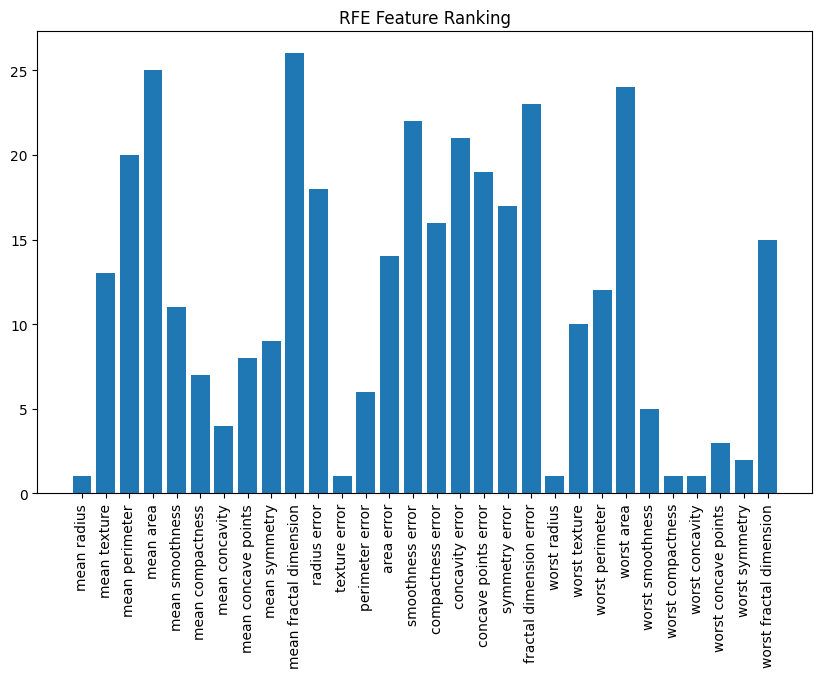

In [3]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
ranking = rfe.ranking_

# Visualize feature ranking
plt.figure(figsize=(10,6))
plt.bar(range(len(ranking)), ranking)
plt.xticks(range(len(ranking)), X_train.columns, rotation=90)
plt.title('RFE Feature Ranking')
plt.show()


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Full model
full_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
full_pred = full_model.predict(X_test)
full_proba = full_model.predict_proba(X_test)[:,1]

# RFE model
rfe_model = LogisticRegression(max_iter=1000).fit(X_train[selected_features], y_test)
rfe_pred = rfe_model.predict(X_test[selected_features])
rfe_proba = rfe_model.predict_proba(X_test[selected_features])[:,1]

metrics = {
    'Full Features': [accuracy_score(y_test, full_pred), precision_score(y_test, full_pred),
                     recall_score(y_test, full_pred), f1_score(y_test, full_pred), roc_auc_score(y_test, full_proba)],
    'Top 5 RFE': [accuracy_score(y_test, rfe_pred), precision_score(y_test, rfe_pred),
                  recall_score(y_test, rfe_pred), f1_score(y_test, rfe_pred), roc_auc_score(y_test, rfe_proba)]
}
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']
comparison_df = pd.DataFrame(metrics, index=metric_names)
print(comparison_df.round(3))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Found input variables with inconsistent numbers of samples: [455, 114]

In [5]:
results = {}
for n in [3, 5, 7, 10]:
    rfe_n = RFE(LogisticRegression(max_iter=1000), n_features_to_select=n)
    rfe_n.fit(X_train, y_train)
    X_test_n = X_test.loc[:, rfe_n.support_]
    model_n = LogisticRegression(max_iter=1000).fit(X_train.loc[:, rfe_n.support_], y_train)
    pred_n = model_n.predict(X_test_n)
    results[f'Top {n}'] = accuracy_score(y_test, pred_n)

print(pd.Series(results).sort_index())


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Top 10    0.947368
Top 3     0.789474
Top 5     0.947368
Top 7     0.947368
dtype: float64
